In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("F:/PYTHAN/PYTHAN/iNeuron/EDA/PCA/Data_set/train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


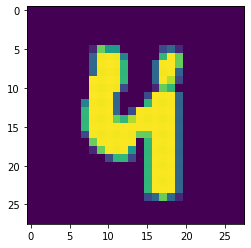

In [9]:
# Row no 23948 has image of 4 so we can see it by help of below code
plt.imshow(df.iloc[23948:23949, 1:].values.reshape(28,28))

In [10]:
# we seprate out input and output column

x = df.iloc[:,1:] # we separate out input column
y = df.iloc[:,0:1]

In [11]:
x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [14]:
x_test.shape

(8400, 784)

In [15]:
x_train.shape

(33600, 784)

In [16]:
y_test.shape

(8400, 1)

In [17]:
y_train.shape

(33600, 1)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()


In [20]:
knn.fit(x_train,y_train)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [23]:
# with the help of PCA
# standerrize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [25]:
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [26]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [27]:
x1_train = pca.fit_transform(x1_train)
x1_test = pca.transform(x1_test)

In [28]:
x1_train.shape

(33600, 100)

In [29]:
knn = KNeighborsClassifier()
knn.fit(x1_train,y1_train)

C:\Users\vishal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [30]:
y1_pred = knn.predict(x1_test)

In [31]:
y1_pred

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [32]:
accuracy_score(y1_test,y1_pred)

0.9545238095238096

In [33]:
x1_train.shape

(33600, 100)

In [34]:
pca = PCA(n_components=2)


In [35]:
x1_train = pca.fit_transform(x1_train)
x1_test = pca.transform(x1_test)

In [36]:
x1_train

array([[-2.71863221, -0.48973065],
       [-0.67698646, -6.75385371],
       [-3.03323803,  6.50993251],
       ...,
       [ 2.14882044,  0.78056874],
       [ 1.05957121,  0.94779396],
       [17.70258945,  1.96186285]])

In [37]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023399])

In [38]:
import plotly.express as px

In [39]:
pca.components_.shape
#Eigen vectors

(2, 100)

In [40]:
pca.explained_variance_ratio_
# variance in percent 

array([0.08054363, 0.0577677 ])

In [41]:
pca = PCA(n_components=None)



In [45]:
x1_train = pca.fit_transform(x_train)
x1_test = pca.transform(x_test)

In [46]:
pca.explained_variance_.shape

(784,)

In [47]:
pca.components_

array([[-1.34432038e-19, -5.55111512e-17, -5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.48703186e-19, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.91572717e-19,  1.11022302e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-0.00000000e+00, -3.33026041e-02, -9.45794328e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 0.00000000e+00,  5.12433967e-02,  7.04277493e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.40587715e-02,  3.09092053e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [49]:
pca.components_.shape

(784, 784)

In [54]:
pca.explained_variance_ratio_

array([9.77072202e-02, 7.12934512e-02, 6.17541312e-02, 5.38955140e-02,
       4.89255299e-02, 4.33684433e-02, 3.27657386e-02, 2.89270270e-02,
       2.77070300e-02, 2.32917149e-02, 2.09310651e-02, 2.04716403e-02,
       1.70779469e-02, 1.68320607e-02, 1.58472125e-02, 1.48798267e-02,
       1.32309818e-02, 1.28393670e-02, 1.18338358e-02, 1.15118647e-02,
       1.07596902e-02, 1.02421519e-02, 9.66625789e-03, 9.17296381e-03,
       8.84714420e-03, 8.33528008e-03, 8.15070612e-03, 7.75332066e-03,
       7.41986542e-03, 6.93325236e-03, 6.60848230e-03, 6.33209492e-03,
       6.03213006e-03, 5.88730096e-03, 5.61830060e-03, 5.39860932e-03,
       5.07909781e-03, 4.87126968e-03, 4.71252924e-03, 4.64556419e-03,
       4.52489910e-03, 4.44058540e-03, 4.16518263e-03, 3.95636411e-03,
       3.83603691e-03, 3.73127577e-03, 3.60704723e-03, 3.48865016e-03,
       3.34199674e-03, 3.18010732e-03, 3.14204894e-03, 3.07234334e-03,
       2.92367086e-03, 2.86553852e-03, 2.79118328e-03, 2.69328579e-03,
      

In [55]:
import numpy as np

In [56]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09770722, 0.16900067, 0.2307548 , 0.28465032, 0.33357585,
       0.37694429, 0.40971003, 0.43863706, 0.46634409, 0.4896358 ,
       0.51056687, 0.53103851, 0.54811645, 0.56494851, 0.58079573,
       0.59567555, 0.60890653, 0.6217459 , 0.63357974, 0.6450916 ,
       0.65585129, 0.66609344, 0.6757597 , 0.68493267, 0.69377981,
       0.70211509, 0.7102658 , 0.71801912, 0.72543898, 0.73237223,
       0.73898072, 0.74531281, 0.75134494, 0.75723224, 0.76285054,
       0.76824915, 0.77332825, 0.77819952, 0.78291205, 0.78755761,
       0.79208251, 0.7965231 , 0.80068828, 0.80464464, 0.80848068,
       0.81221196, 0.815819  , 0.81930765, 0.82264965, 0.82582976,
       0.82897181, 0.83204415, 0.83496782, 0.83783336, 0.84062454,
       0.84331783, 0.84596712, 0.84853351, 0.85106204, 0.85351457,
       0.85592008, 0.85831105, 0.86057999, 0.86279635, 0.8649424 ,
       0.86700054, 0.86901774, 0.87098082, 0.87291702, 0.87479944,
       0.87665559, 0.87847316, 0.88022525, 0.88195105, 0.88360

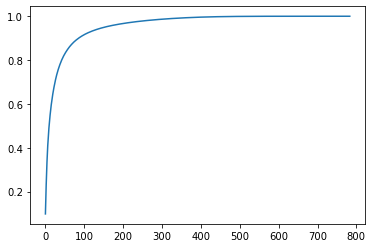

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#90% variance we should take